In [1]:
# Imports necessary packages for program
import nltk
import pandas as pd
import numpy as np
import sklearn
import re  
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# For searching the file directory
import os
import os.path
import string

In [2]:
# identify the path to the corpus
path = r'/Users/cjgendron/Documents/cjgprograms/master_speech.xlsx'
# Read tin the excel file
tempfile = pd.ExcelFile(path)
# parse the excel file
rawfile = tempfile.parse(0)
# look at the data
print(rawfile)

    id             candidate party  year  sentiment  party_num  \
0    2      mckinley_william     r  1900          0          1   
1    7         bryan_william     d  1900          0          0   
2   18          parker_alton     d  1904          0          0   
3   54        taft_william08     r  1908          1          1   
4    4      wilson_woodrow12     r  1912          0          1   
5   13        taft_william12     r  1912          0          1   
6   19        hughes_charles     r  1916          1          1   
7   20      wilson_woodrow16     d  1916          0          0   
8   53        harding_warren     r  1920          0          1   
9    8      hoover_herbert28     r  1928          0          1   
10  23              smith_al     d  1928          1          0   
11  24      hoover_herbert32     r  1932          0          1   
12  38  roosevelt_franklin32     d  1932          0          0   
13  40            landon_alf     r  1936          0          1   
14  41  ro

In [3]:
# Collapsing a bunch of columns into one column
rawfile['comb_text'] = rawfile[rawfile.columns[8:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis = 1)

rawfile['comb_text'] = rawfile['text'].astype(str) + ' ' + rawfile['text2'].astype(str)+ ' ' + rawfile['text3'].astype(str)+ ' ' + rawfile['text4'].astype(str)+ ' ' + rawfile['text5'].astype(str)

# 0 = democrat, 1 = republican
df_party1 = rawfile.copy(deep=True)
# Below we can select the 3 columns we want instead of
# specifying a bunch of columns we don't want
df_party = df_party1.filter(['id', 'party_num', 'comb_text'])
#print(df_party)

In [4]:
# Generate empty lists to populate with party label, cleaned text and index.
PartyList = []
TextList = []
IndexList = []

# https://www.geeksforgeeks.org/create-a-list-from-rows-in-pandas-dataframe/
# clean data and add to empty lists
for row in df_party.itertuples():
    partylabel = row.party_num
    textlabel = row.comb_text
    textlabel = textlabel.replace('\n',' ') # remove \n
    textlabel = textlabel.replace("\'","'")
    textlabel = textlabel.replace('\t',' ') # remove \t
    #textlabel = textlabel.replace(',',' ') # remove ,
    #textlabel = textlabel.replace('.',' ') # remove .
    #textlabel = textlabel.replace('"',' ') # remove "
    #textlabel = textlabel.replace("'",' ') # remove '
    textlabel = textlabel.replace('nan',' ') # remove nan
    #textlabel = textlabel.replace('-',' ') # remove -
    #textlabel = textlabel.replace(' - ',' ') # remove -
    #textlabel = textlabel.replace('?',' ') # remove ?
    #textlabel = textlabel.replace('!',' ') # remove !
    #textlabel = textlabel.replace(':',' ') # remove :
    #textlabel = textlabel.replace(';',' ') # remove ;
    #textlabel = textlabel.replace('  ',' ') # remove double spaces
    indexlabel = row.id
    TextList.append(textlabel)
    PartyList.append(partylabel)
    IndexList.append(indexlabel)

#print(IndexList)
#print(PartyList)
#print(TextList)

In [6]:
# Normal word count vectorizer
MyVect=CountVectorizer(input='content', stop_words='english', token_pattern='(?u)[a-zA-Z]+')
# boolean vectorizer
MyVect_bool=CountVectorizer(input='content', stop_words='english', token_pattern='(?u)[a-zA-Z]+', binary = True)
# TFIDF vectorizer
MyVect_tf=TfidfVectorizer(input='content', stop_words='english', token_pattern='(?u)[a-zA-Z]+')

## NOw I can vectorize using my list of complete paths to my files
# Fit the word count vectorizer, save under new name
X_text=MyVect.fit_transform(TextList)
# Fit the boolean vectorizer, save under new name
Bool_X_text=MyVect_bool.fit_transform(TextList)
# Fit the TFIDF vectorizer, save under new name
tf_X_text=MyVect_tf.fit_transform(TextList)
## Let's get the feature names which ARE the words
ColumnNamesText=MyVect.get_feature_names()
#print(ColumnNamesText)
df_party

,id,party_num,comb_text
0,2,1,The message which you bring to me is one of si...
1,7,0,I feel that I owe an apology or explanation to...
2,18,0,"To the Honorable Champ Clark and Others, Commi..."
3,54,1,Senator Warner and Gentlemen of the Committee:...
4,4,1,Mr. James and Gentlemen of the Notification Co...
5,13,1,I accept the nomination which you tender. I do...
6,19,1,Mr. Chairman and Delegates:\n\nI have not desi...
7,20,0,I cannot accept the leadership and responsibil...
8,53,1,"Chairman Lodge, Members of the Notification Co..."
9,8,1,Mr. Chairman and my fellow citizens:\n\nIn acc...


In [7]:
## OK good - but we want a document topic model A DTM (matrix of counts)
CorpusDF_text=pd.DataFrame(X_text.toarray(), columns=ColumnNamesText, index = IndexList)
#print(CorpusDF_text)

In [8]:
bool_CorpusDF_text=pd.DataFrame(Bool_X_text.toarray(), columns=ColumnNamesText, index = IndexList)
#print(bool_CorpusDF_text)

In [9]:
tf_CorpusDF_text=pd.DataFrame(tf_X_text.toarray(), columns=ColumnNamesText, index = IndexList)
#print(tf_CorpusDF_text)

In [10]:
# generate labels for the variables we are testing against, see which label k- means works best on
partyLabels= df_party['party_num'].values # 1= rep 0=dem
sentLabels= df_party1['sentiment'].values # 1=pos 0=neg
incpLabels= df_party1['incumbent_party'].values # 1= incumbent party 0= challenger
inccLabels= df_party1['incumbent_candidate'].values # 1= incumbent candidate 0=challenger
winnerLabels= df_party1['winner'].values # 1= election winner 0= loser
unemLabels= df_party1['unemployment'].values # 1= low to normal unemployment 0= high unemployment
GDPLabels= df_party1['GDP'].values # 1= good gdp growth 0= poor/negative gdp growth
inflationLabels= df_party1['Inflation'].values # 1= inflation rates at or near Fed target 0= out of control inflation
## results showed that matching labels was not informative ##

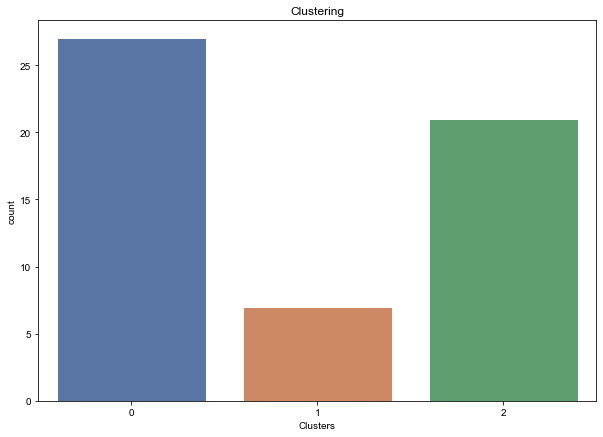

None


In [11]:
# K-means
from sklearn.cluster import KMeans
# Run against term frequency
km1 = KMeans(n_clusters=3, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km1.fit(CorpusDF_text)
# check sizes of different clusters
plt.figure(figsize=(10,7))
plt.title('Clustering')
plt.xlabel('Clusters')
sn.set(font_scale=1.4) # for label size
sn.countplot(km1.labels_)
print(plt.show())

In [12]:
# Generate a data frame to look at the candidates in each dataframe
cluster_map = pd.DataFrame()
# find cluster labels
cluster_map['cluster'] = km1.labels_
# find candidates
cluster_map['candidate']= rawfile['candidate']
#cluster_map[cluster_map.cluster == 1]
#cluster_map[cluster_map.cluster == 0]
cluster_map[cluster_map.cluster == 2]

,cluster,candidate
25,2,nixon_richard60
29,2,nixon_richard68
31,2,nixon_richard72
36,2,carter_jimmy80
38,2,reagan_ronald84
39,2,bush_georgehw88
40,2,dukakis_michael
41,2,clinton_bill92
42,2,bush_georgehw92
43,2,dole_robert


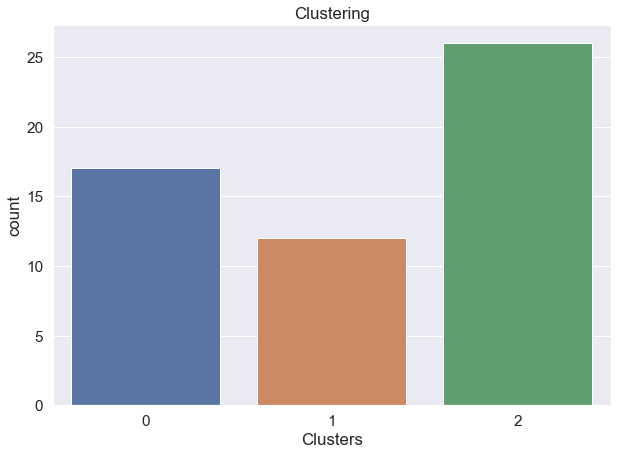

None


In [13]:
# try boolean vector
km2 = KMeans(n_clusters=3, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km2.fit(bool_CorpusDF_text)
plt.figure(figsize=(10,7))
plt.title('Clustering')
sn.set(font_scale=1.4) # for label size
sn.countplot(km2.labels_)
plt.xlabel('Clusters')
print(plt.show())

col_0   0   1
row_0        
0      14  12
1      14  15



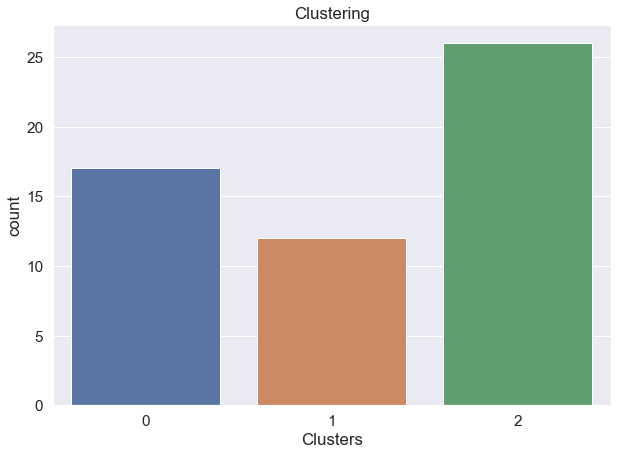

None


In [14]:
# try tf-idf normalized
km3 = KMeans(n_clusters=2, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km3.fit(tf_CorpusDF_text)
plt.figure(figsize=(10,7))
plt.title('Clustering')
sn.set(font_scale=1.4) # for label size
sn.countplot(km2.labels_)
plt.xlabel('Clusters')
print(plt.show())

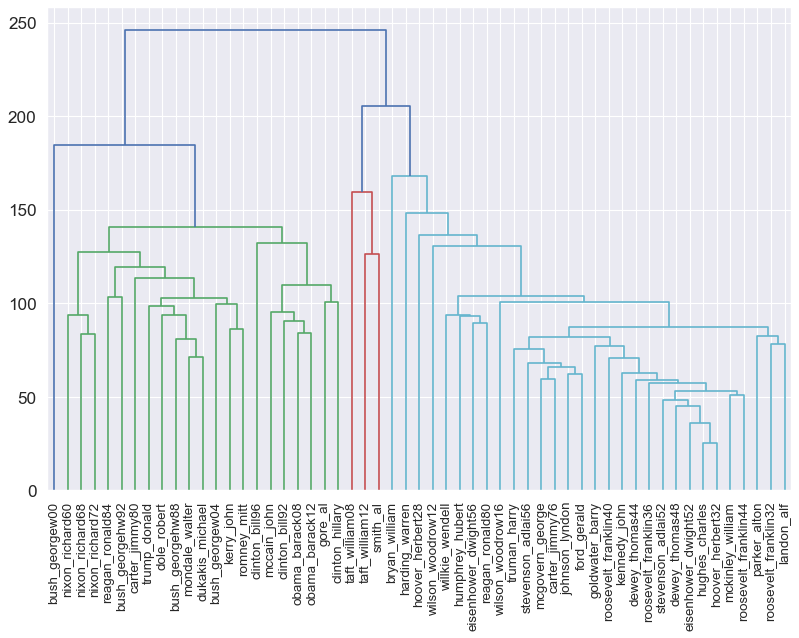

In [17]:
# now hierarchical
# import packages for generating and plotting dendrograms
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
# set index to candidate because those are the values we want to cluster
CorpusDF_text=CorpusDF_text.set_index(rawfile['candidate'])
# set linkage value to 'complete' for max distance cluster calculations
freq = hierarchy.linkage(CorpusDF_text, 'complete')
# set plot parameters to set size, colors, and labels
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
fig=hierarchy.dendrogram(freq, leaf_rotation=90, leaf_font_size=12, labels=CorpusDF_text.index)
# show the dendrogram
plt.show(fig)